# Face Recognition and Sentiment Analysis

### Step RE1: Import libraries and define face compare function to Amazon Rekognition

In [66]:
#Copyright 2018 Amazon.com, Inc. or its affiliates. All Rights Reserved.
#PDX-License-Identifier: MIT-0 (For details, see https://github.com/awsdocs/amazon-rekognition-developer-guide/blob/master/LICENSE-SAMPLECODE.)

import boto3
import json
import urllib
from io import BytesIO
from IPython.display import HTML
from IPython.display import Audio
from PIL import Image as Img
import matplotlib.pyplot as plt
import matplotlib.patches as patches

rekognition=boto3.client('rekognition')

def compare_faces(imageSource, imageTarget):

    response=rekognition.compare_faces(SimilarityThreshold=70,
                                  SourceImage={'Bytes': imageSource.read()},
                                  TargetImage={'Bytes': imageTarget.read()})
    
    if not response['FaceMatches']:
        print('No face match found')
        return False
    else:
        for faceMatch in response['FaceMatches']:
            position = faceMatch['Face']['BoundingBox']
            similarity = faceMatch['Similarity']
            print('Matched face found with ' + str(round(similarity,2)) + '% confidence\n' +
                  'Location in target image: {left:' +
                   str(round(position['Left'],2)) + ',top:' +
                   str(round(position['Top'],2)) + ',height:' +
                   str(round(position['Height'],2)) + ',width:' +
                   str(round(position['Width'],2)) + '}')
            details = {
                'confidence': similarity,
                'left': position['Left'],
                'top': position['Top'],
                'height': position['Height'],
                'width': position['Width']
            }
            return details
                   
 
    imageSource.close()
    imageTarget.close()


       

### Step RE2: Try face compare

***Let's find two images of Mohamed Salah (Liverpool FC player)     
Sorry if you support another team, but do not take it personally :)***

In [2]:
# image source = https://www.liverpoolfc.com/news/first-team/277625-mohamed-salah-i-can-t-explain-how-it-feels-it-s-a-dream-come-true
salah_a_url = 'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/default/0001/50/thumb_49256_default_news_size_5.jpeg'

# image source = https://www.liverpoolfc.com/news/first-team/339044-mohamed-salah-manchester-united
salah_b_url = 'https://d3j2s6hdd6a7rg.cloudfront.net/v2/uploads/media/default/0001/82/thumb_81992_default_news_size_5.jpeg'

HTML(data='<figure style="float:left;"><img src="{}" alt="Source" width="200"/><figcaption ><center>Source</center></figcaption></figure><figure style="float:right;"><img src="{}" alt="Target" width="200"/><figcaption><center>Target</center></figcaption></figure>'.format(salah_a_url, salah_b_url))

***Now let's compare the two images of Salah***    
Notice that the target image has the face in different angle, and in different expression

In [3]:
salah_a = urllib.request.urlopen(salah_a_url)
salah_b = urllib.request.urlopen(salah_b_url)
compare_1_result = compare_faces(salah_a, salah_b)

Matched face found with 96.07% confidence
Location in target image: {left:0.44,top:0.12,height:0.24,width:0.1}


***Salah plays with Liverpool FC. Will Rekognition be able to identify him in a picture of Liverpool players?***

In [4]:
# image source = https://www.dailystar.co.uk/sport/football/631810/Liverpool-celebrate-Premier-League-Asia-Trophy-Leicester-Hong-Kong-sportgalleries
liverpool_url = 'https://cdn.images.dailystar.co.uk/dynamic/122/photos/880000/900x738/1017880.jpg'

HTML(data='<figure style="float:left;"><img src="{}" alt="Source" width="300"/><figcaption ><center>Source</center></figcaption></figure><figure style="float:right;"><img src="{}" alt="Target" width="220"/><figcaption><center>Target</center></figcaption></figure>'.format(salah_a_url, liverpool_url))

In [5]:
salah_a = urllib.request.urlopen(salah_a_url)
liverpool = urllib.request.urlopen(liverpool_url)
compare_2_result = compare_faces(salah_a, liverpool)

Matched face found with 86.16% confidence
Location in target image: {left:0.69,top:0.5,height:0.03,width:0.02}


***Now, let's draw a rectangle on the matched face, based on the bounding box information returned***

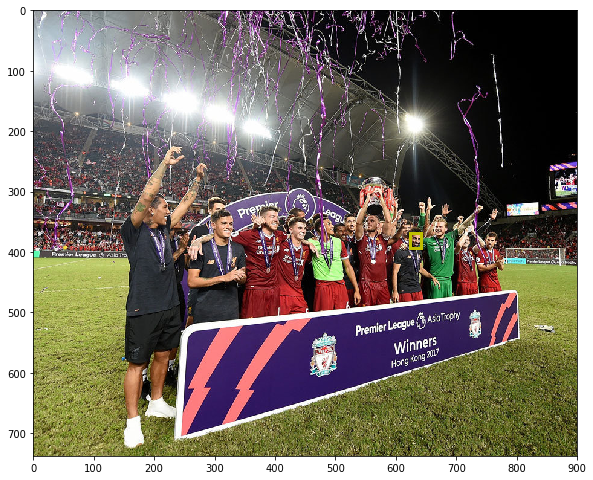

In [21]:
# Get image sizes
liverpool = urllib.request.urlopen(liverpool_url)
file = BytesIO(liverpool.read())
width, height = Img.open(file).size

# Load image to plot
liverpool = urllib.request.urlopen(liverpool_url)
liverpool_image = plt.imread(liverpool, format='jpg')

# Get figure and axes
fig,ax = plt.subplots()
fig.set_size_inches(width/fig.dpi*0.8,height/fig.dpi*0.8)

# Get bounding box details
bounding_box = compare_2_result

ax.imshow(liverpool_image)

# Create a Rectangle patch
x = bounding_box['left']*width
y = bounding_box['top']*height
w = bounding_box['width']*width
h = bounding_box['height']*height
rect = patches.Rectangle((x,y),w,h,linewidth=3,edgecolor='y',facecolor='none')

# Add the bounding box
ax.add_patch(rect)

plt.show()

***What if we present a lineup picture of Bayern Munich players? It should not find Salah in there...***

In [11]:
# image source = https://fcbayern.com/en/club/honours/all-honours
bayern_url = 'https://fcbayern.com/binaries/content/gallery/fc-bayern/homepage/club/erfolge/meisterschaft/2016_header.jpg'

HTML(data='<figure style="float:left;"><img src="{}" alt="Source" width="200"/><figcaption ><center>Source</center></figcaption></figure><figure style="float:right;"><img src="{}" alt="Target" width="200"/><figcaption><center>Target</center></figcaption></figure>'.format(salah_a_url, bayern_url))

In [18]:
salah_a = urllib.request.urlopen(salah_a_url)
bayern = urllib.request.urlopen(bayern_url)
compare_3_result = compare_faces(salah_a, bayern)

No face match found


### Step RE3: Photo-ID

***Amazon Rekognition can recognize face in photo ID too, that could be part of real use-case feature***

In [28]:
photo_id_path = 'images/yudho-card.jpg'
person_path = 'images/yudho.jpg'

HTML(data='<figure style="float:left;"><img src="{}" alt="Source" width="200"/><figcaption ><center>Source</center></figcaption></figure><figure style="float:right;"><img src="{}" alt="Source" width="120"/><figcaption ><center>Target</center></figcaption></figure>'.format(photo_id_path, person_path))




In [30]:
person = open(person_path,'rb')
photo_id = open(photo_id_path, 'rb')
compare_4_result = compare_faces(person, photo_id)

Matched face found with 99.65% confidence
Location in target image: {left:0.76,top:0.46,height:0.18,width:0.1}


### Step RE4: Detect Text

***Can we extract the text in photo ID? Let's give it a try***

In [53]:
photo_id = open(photo_id_path, 'rb')

def detect_text(image):

    response = rekognition.detect_text(Image=
        {'Bytes': image.read()}
    )
    if len(response['TextDetections']) == 0:
        print('No Text Found')
    else:
        texts = []
        for text_item in response['TextDetections']:
            if text_item['Type'] == 'LINE':
                texts.append(text_item['DetectedText'])
        texts = '\n'.join(str(x) for x in texts)
        print(texts)
        return(texts)

# Call Amazon Rekognition detect_text API
text_detect_result = detect_text(photo_id)


Student Card
Student ID:
YUDHO AHMAD DIPONEGORO
Admit Term:
2018/2019 Semester 1
Career: Graduate


***You can also use Amazon Textract specific for text extraction from image.***    
The service is currently on preview. Do sign-up to get whitelisted

### Step RE5: Read it out loud

***Let's read out the result of text detection with Amazon Polly***

In [65]:
polly = boto3.client('polly')

def synthesize_speech(text):
    response = polly.synthesize_speech(
        OutputFormat='mp3',
        SampleRate='8000',
        Text=text,
        TextType='text',
        VoiceId='Matthew',
        LanguageCode='en-GB'
    )
    return response
    
# Call Polly API
voice_synthesis_result = synthesize_speech(text_detect_result)

# Save result to file
file = open('voices/speech.mp3', 'wb')
file.write(voice_synthesis_result['AudioStream'].read())
file.close()


Audio(filename='voices/speech.mp3')
    

### Step RE6: Search by face

**IMPORTANT :** ***Upload your photo to folder 'images', in jpg format***    
How? On another tab, just open the same Jupyter Notebook page. Navigate to directory machine-learning-workshop/face-recognition-and-sentiment-analysis/images, and click on the Upload button.              

We will try to test the search-by-face function, whether it will identify us correctly

***Define the functions that talk to Amazon Rekognition below***

In [13]:
#Copyright 2018 Amazon.com, Inc. or its affiliates. All Rights Reserved.
#PDX-License-Identifier: MIT-0 (For details, see https://github.com/awsdocs/amazon-rekognition-developer-guide/blob/master/LICENSE-SAMPLECODE.)

def create_collection(collectionName):
    maxResults=1
    collectionId=collectionName

    #Create a collection
    print('Creating collection:' + collectionId)
    response=rekogntion.create_collection(CollectionId=collectionId)
    print('Collection ARN: ' + response['CollectionArn'])
    print('Status code: ' + str(response['StatusCode']))
    print('Done...')

def index_face(faceName, sourceFile, collectionId):

    imageSource=open(sourceFile,'rb')
    response=client.index_faces(CollectionId=collectionId,
                                Image={'Bytes': imageSource.read()},
                                ExternalImageId=faceName,
                                MaxFaces=1,
                                QualityFilter="AUTO",
                                DetectionAttributes=['ALL'])

    print ('Results for ' + faceName) 	
    print('Faces indexed:')						
    for faceRecord in response['FaceRecords']:
         externalFaceIds[faceRecord['Face']['FaceId']] = faceName
         print('  Face ID: ' + faceRecord['Face']['FaceId'])
         print('  Location: {}'.format(faceRecord['Face']['BoundingBox']))

    print('Faces not indexed:')
    for unindexedFace in response['UnindexedFaces']:
        print(' Location: {}'.format(unindexedFace['FaceDetail']['BoundingBox']))
        print(' Reasons:')
        for reason in unindexedFace['Reasons']:
            print('   ' + reason)

def search_faces_by_image(sourceFile, collectionId):
    
    threshold = 70
    maxFaces=1

    imageSource=open(sourceFile,'rb')
  
    response=rekognition.search_faces_by_image(CollectionId=collectionId,
                                Image={'Bytes': imageSource.read()},
                                FaceMatchThreshold=threshold,
                                MaxFaces=maxFaces)

                                
    faceMatches=response['FaceMatches']
    print ('Matching faces')
    
    if not faceMatches:
        print ('No match found')
    else:
        for match in faceMatches:
                print ('FaceId:' + match['Face']['FaceId'] + ' with name ' + externalFaceIds[match['Face']['FaceId']])
                print ('Similarity: ' + "{:.2f}".format(match['Similarity']) + "%")
                print

def delete_collection(collectionId):

    print('Attempting to delete collection ' + collectionId)
    statusCode=''
    try:
        response=rekognition.delete_collection(CollectionId=collectionId)
        statusCode=response['StatusCode']
        
    except ClientError as e:
        if e.response['Error']['Code'] == 'ResourceNotFoundException':
            print ('The collection ' + collectionId + ' was not found ')
        else:
            print ('Error other than Not Found occurred: ' + e.response['Error']['Message'])
        statusCode=e.response['ResponseMetadata']['HTTPStatusCode']
    print('Operation returned Status Code: ' + str(statusCode))
    print('Done...')

       

***Let's create our first face collection***

In [15]:
collectionID = 'good_people'
create_collection(collectionID)

Creating collection:good_people
Collection ARN: aws:rekognition:us-east-1:344028372807:collection/good_people
Status code: 200
Done...


***Let's add faces to our face collection, starting from yours :)***    

**IMPORTANT :** ***Change the name and file name below as appropriate***

In [17]:
externalFaceIds={}

#index_face('<MY_NAME>','images/<FILE_NAME>.jpg','good_people')
index_face('yudho','images/yudho.jpg','good_people')

Results for yudho
Faces indexed:
  Face ID: 7a6dc03e-0c05-4f10-b2d0-be0a5e212d11
  Location: {'Width': 0.39532074332237244, 'Height': 0.4378424882888794, 'Left': 0.36106404662132263, 'Top': 0.22218658030033112}
Faces not indexed:
